In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
len(boston)

506

In [5]:
boston['MEDV'] = boston_dataset.target

In [6]:
boston.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


# PART 1

### check for missing values in all the columns

In [7]:
boston.isnull().values.any()

False

### a) set the size of the figure
### b) plot a histogram showing the distribution of the target values

C:\Users\Luke\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


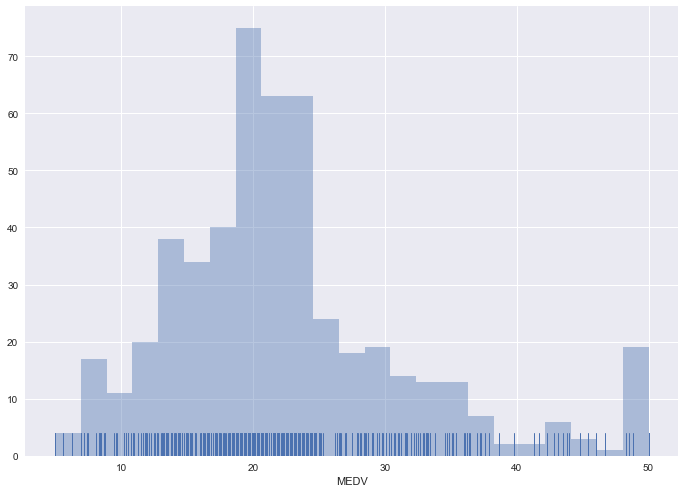

In [8]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston.MEDV, kde=False, rug=True);

### compute the pair wise correlation for all columns

In [9]:
# compute the pair wise correlation for all columns
bos_corr = boston.corr(method='pearson', min_periods=1)
bos_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### use the heatmap function from seaborn to plot the correlation matrix annot = True to print the values inside the square. Use sns.heatmap

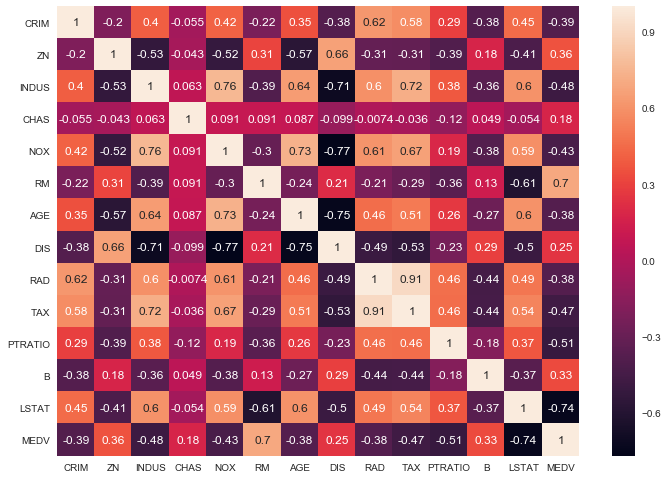

In [10]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square. Use sns.heatmap
sns.heatmap(bos_corr, annot=True)

### LUKE: There is a lot of correlation between variables, some more than others.  For variables that correlate with MEDV (what we care about), LSTAT has the strongest negative correlation (-0.74) and RM has the strongest positive correlation (+0.70).  Both of these correlations make logical sense (LSTAT = low status population and RM = number of rooms).

### scatterplot between LSTAT (blue), PTRATIO(red), NDUS (green), and the target value MDEV

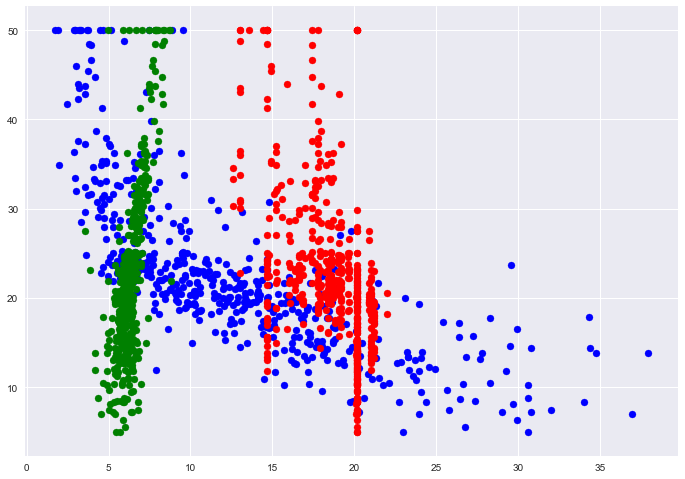

In [11]:
# scatterplot between LSTAT (blue), PTRATIO(red), NDUS (green), and the target value MDEV
plt.scatter(boston.LSTAT, boston.MEDV, color='blue', label='LSTAT')
plt.scatter(boston.PTRATIO, boston.MEDV, color='red', label='PTRATIO')
plt.scatter(boston.RM, boston.MEDV, color='green', label='RM')

# PART 2

### Prepare the data for training

In [12]:
# Prepare the data for training
target = boston.MEDV
features = boston.copy()
del features['MEDV']
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Create Validation Data - Split the data into training and testing sets

In [13]:
# Create Validation Data - Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.

x_train, x_test = train_test_split(features, test_size=0.2,random_state=100)
y_train, y_test = train_test_split(target, test_size=0.2,random_state=100)

In [14]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
print(x_train.head())
print(x_test.head())

404
102
404
102
         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
379  17.86670   0.0  18.10   0.0  0.671  6.223  100.0  1.3861  24.0  666.0   
311   0.79041   0.0   9.90   0.0  0.544  6.122   52.8  2.6403   4.0  304.0   
157   1.22358   0.0  19.58   0.0  0.605  6.943   97.4  1.8773   5.0  403.0   
244   0.20608  22.0   5.86   0.0  0.431  5.593   76.5  7.9549   7.0  330.0   
56    0.02055  85.0   0.74   0.0  0.410  6.383   35.7  9.1876   2.0  313.0   

     PTRATIO       B  LSTAT  
379     20.2  393.74  21.78  
311     18.4  396.90   5.98  
157     14.7  363.43   4.59  
244     19.1  372.49  12.50  
56      17.3  396.90   5.77  
        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
198  0.03768  80.0   1.52   0.0  0.404  7.274   38.3  7.3090  2.0  329.0   
229  0.44178   0.0   6.20   0.0  0.504  6.552   21.4  3.3751  8.0  307.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120   76.7  2.2875  1.0  273.0   
31   1.35472   0.0   8.14   0.0

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### Train the model using sklearn LinearRegression

In [16]:
# Train the model using sklearn LinearRegression

regr = linear_model.LinearRegression()
model = regr.fit(x_train, y_train)
model.score(x_train,y_train)

0.7336930732880773

### a) model evaluation for training set
### b) model evaluation for testing set
### c) root mean square error of the model
### d) r-squared score of the model

In [17]:
# model evaluation for training set
y_train_pred = model.predict(x_train)

# model evaluation for testing set
y_test_pred = model.predict(x_test)

# root mean square error of the model
print("RMSE of training data: ", mean_squared_error(y_train,y_train_pred))
print("RMSE of testing data: ", mean_squared_error(y_test,y_test_pred))

# r-squared score of the model
print("r^2 of training data: ", r2_score(y_train,y_train_pred))
print("r^2 of testing data: ", r2_score(y_test,y_test_pred))

RMSE of training data:  21.652645742402527
RMSE of testing data:  23.62245899458709
r^2 of training data:  0.7336930732880773
r^2 of testing data:  0.7554467329645207


### plotting the y_test vs y_pred

Text(0,0.5,'Predictions')

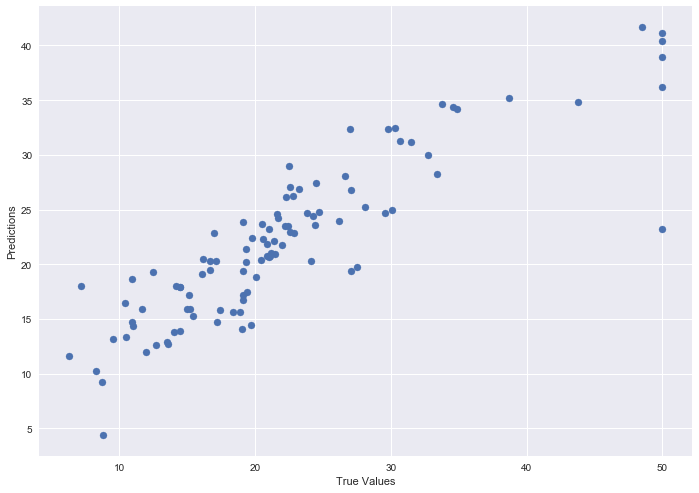

In [18]:
# plotting the y_test vs y_pred
# ideally should have been a straight line

## The line / model
plt.scatter(y_test, y_test_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# PART 3

In [19]:
from sklearn.decomposition import PCA

### instantiate PCA

In [20]:
# instantiate PCA
pca = PCA(n_components=2)

### create new X and Y

In [21]:
#create new X and Y

# LUKE: I have already done this above:
# my X = features
# my y = target

### fit pca

In [22]:
#fit pca
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### transform original data to the PCA components

In [23]:
# transform original data to the PCA components
features_reduced = pca.transform(features)
print("Reduced dataset shape:", features_reduced.shape)

Reduced dataset shape: (506, 2)


### create train test split

In [24]:
# create train test split

x_reduce_train, x_reduce_test = train_test_split(features_reduced, test_size=0.2,random_state=100)

In [25]:
print(len(x_reduce_train))
print(len(x_reduce_test))

404
102


### fit linear regression model and evaluate performance

In [26]:
# fit linear regression model and evaluate performance
model2 = regr.fit(x_reduce_train, y_train)
model2.score(x_reduce_train,y_train)

0.23814696075119934

### a) model evaluation for training set
### b) model evaluation for testing set
### c) root mean square error of the model
### d) r-squared score of the model

In [27]:
# model evaluation for training set
y_train_pred2 = model.predict(x_reduce_train)

# model evaluation for testing set
y_test_pred2 = model.predict(x_reduce_test)

# root mean square error of the model
print("RMSE of training data: ", mean_squared_error(y_train,y_train_pred2))
print("RMSE of testing data: ", mean_squared_error(y_test,y_test_pred2))

# r-squared score of the model
print("r^2 of training data: ", r2_score(y_train,y_train_pred2))
print("r^2 of testing data: ", r2_score(y_test,y_test_pred2))

RMSE of training data:  61.94406645859289
RMSE of testing data:  71.87637829415321
r^2 of training data:  0.23814696075119934
r^2 of testing data:  0.25589443763915687


# PART 4

## conduct the same steps as linear regression model but with Random Forest Regressor

### a) Prepare the data for training
### b) Create Validation Data - Split the data into training and testing sets

In [32]:
# Prepare the data for training
target = boston.MEDV
features = boston.copy()
del features['MEDV']
print(target.head(),'\n')
print(features.head())

# Create Validation Data - Split the data into training and testing sets
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
x_train4, x_test4 = train_test_split(features, test_size=0.2,random_state=100)
y_train4, y_test4 = train_test_split(target, test_size=0.2,random_state=100)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


### a) Fit a Random Forest & train the mode
### b) model evaluation for training set
### c) model evaluation for testing set
### d) root mean square error of the model
### e) r-squared score of the model
### f) plotting the y_test vs y_pred

0.9777772400586461
RMSE of training data:  1.8068683168316828
RMSE of testing data:  13.184401960784314
r^2 of training data:  0.9777772400586461
r^2 of testing data:  0.8635074962281613


Text(0,0.5,'Predictions')

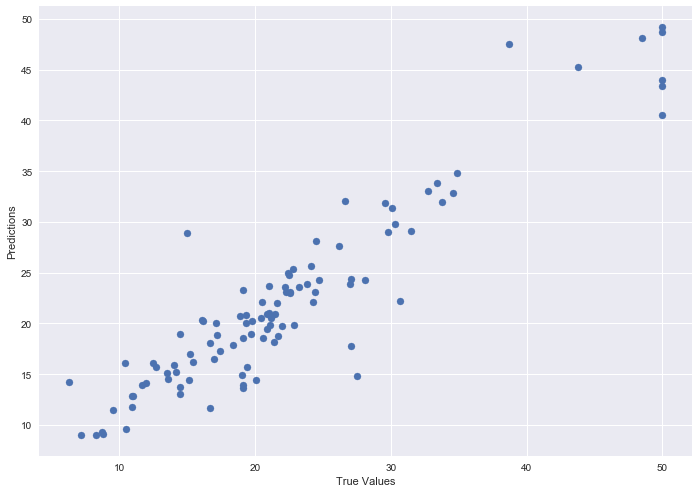

In [37]:
# Fit a Random Forest & train the mode
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor()
model4.fit(x_train4, y_train4)
print(model4.score(x_train4,y_train4))

# model evaluation for training set
y_train_pred4 = model4.predict(x_train4)

# model evaluation for testing set
y_test_pred4 = model4.predict(x_test4)

# root mean square error of the model
print("RMSE of training data: ", mean_squared_error(y_train4,y_train_pred4))
print("RMSE of testing data: ", mean_squared_error(y_test4,y_test_pred4))

# r-squared score of the model
print("r^2 of training data: ", r2_score(y_train4,y_train_pred4))
print("r^2 of testing data: ", r2_score(y_test4,y_test_pred4))

# plotting the y_test vs y_pred
# ideally should have been a straight line

## The line / model
plt.scatter(y_test4, y_test_pred4)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### describe the difference between training and validation error

In [30]:
# describe the difference between training and validation error

# LUKE: The 80/20 split is meant to split the data for training and validation.  The more data the model
# is trained on, the more accurate it will be.  Therefore, we want to train on as much information as 
# possible, which is why the training data gets the 80%. At the same time, we need to reserve the 20% 
# to validate the accuracy of the model. Validation errer essentially determines how well the model 
# generalizes from the training data.